# Linear Regression

The workhorse of empirical research in the social sciences

In [1]:
import matplotlib as mpl
import pandas as pd
import pyrsm as rsm

# increase plot resolution
mpl.rcParams["figure.dpi"] = 150

from typing import List, Tuple

### Example 1: Catalog sales

We have access to data from a company selling men's and women's apparel through mail-order catalogs (dataset `catalog`). The company maintains a database on past and current customers' value and characteristics. Value is determined as the total \$ sales to the customer in the last year.

The catalog company is interested in redesigning their Customer Relationship Management (CRM) strategy. We will proceed in two steps:

1. Estimate a regression model using last year's sales total. Response variable: sales total for each of the 200 households; Explanatory variables: household income (measured in thousands of dollars), size of household, and age of the household head.
2. Interpret each of the estimated coefficients. Also provide a statistical evaluation of the model as a whole.

In [2]:
rsm.load_data(pkg="model", name="catalog", dct=globals())

In [3]:
rsm.describe(catalog)

## Catalog sales

### Description

Data from a company selling men's and women's apparel through mail-order catalogs. The company maintains a database on past and current customers' value and characteristics. Value is determine as the total $ sales to the customer in the last year. The data are a random sample of 200 customers from the company's database.

### Variables

A data frame with 200 observations on 4 variables

- id = Customer id
- Sales =	Total sales (in $) to a household in the past year
- Income = Household income ($1000) 
- HH.size = Size of the household (# of people) 
- Age = Age of the head of the household

In [6]:
evars = ["Income", "HH_size", "Age"]
rvar = "Sales"

In [7]:
fitted = rsm.regress(catalog, rvar=rvar, evars=evars, ssq=True)

Data:  catalog
Response variable    : Sales
Explanatory variables: Income, HH_size, Age
Null hyp.: the effect of x on Sales is zero
Alt. hyp.: the effect of x on Sales is not zero

                             OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     32.33
Date:                Sun, 15 May 2022   Prob (F-statistic):           5.08e-17
Time:                        15:38:19   Log-Likelihood:                -1179.8
No. Observations:                 200   AIC:                             2368.
Df Residuals:                     196   BIC:                             2381.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std

In [8]:
fitted = regress(catalog, form="Sales ~ Income + HH_size + Age")

Data:  catalog
Response variable    : Sales
Explanatory variables: Age, HH_size, Income
Null hyp.: the effect of x on Sales is zero
Alt. hyp.: the effect of x on Sales is not zero

                             OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     32.33
Date:                Sun, 15 May 2022   Prob (F-statistic):           5.08e-17
Time:                        15:38:19   Log-Likelihood:                -1179.8
No. Observations:                 200   AIC:                             2368.
Df Residuals:                     196   BIC:                             2381.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std

In [9]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [10]:
class ProbabilityCalculator:
    def __init__(self, distribution, params) -> None:
        self.distribution = distribution
        self.__dict__.update(params)
        print("Probability calculator")

    def calculate(self):
        print(f"Distribution: {self.distribution}")
        def calc_f_dist(dfn: int, dfd: int, lb: float=0, ub: float=0.95, decimals: int=3) -> Tuple[float, float]:
            print(f"Df 1:\t{dfn}")
            print(f"Df 2:\t{dfd}")

            print(f"Mean:\t{round(stats.f.mean(dfn, dfd, loc=lb), decimals)}")
            print(f"Variance:\t{round(stats.f.var(dfn, dfd, loc=lb), decimals)}")
            print(f"Lower bound:\t{lb}")
            print(f"Upper bound:\t{ub}\n")

            if lb == 0:
                critical_f = round(stats.f.ppf(q=ub, dfn=dfn, dfd=dfd), decimals)

                _num_decimal_places_in_ub = len(str(ub).split('.')[-1])

                print(f"P(X < {critical_f}) = {ub}")
                print(f"P(X > {critical_f}) = {round(1 - ub, _num_decimal_places_in_ub)}")
                return (0, critical_f)

            critical_f_lower = round(stats.f.ppf(q=lb, dfn=dfn, dfd=dfd), decimals)

            _num_decimal_places_in_lb = len(str(lb).split('.')[-1])

            print(f"P(X < {critical_f_lower}) = {lb}")
            print(f"P(X > {critical_f_lower}) = {round(1 - lb, _num_decimal_places_in_lb)}")
            ########################################################################################
            critical_f_upper = round(stats.f.ppf(q=ub, dfn=dfn, dfd=dfd), decimals)

            _num_decimal_places_in_ub = len(str(ub).split('.')[-1])

            print(f"P(X < {critical_f_upper}) = {ub}")
            print(f"P(X > {critical_f_upper}) = {round(1 - ub, _num_decimal_places_in_ub)}")
            ########################################################################################
            _num_decimal_places = max(len(str(ub).split('.')[-1]), len(str(lb).split('.')[-1]))

            print(f"P({critical_f_lower} < X < {critical_f_upper}) = {round((ub - lb), _num_decimal_places)}")
            print(f"1 - P({critical_f_lower} < X < {critical_f_upper} = {round(1 - (ub - lb), _num_decimal_places)}")

            return (critical_f_lower, critical_f_upper)

        def calc_t_dist(df: int, lb: float=0, ub: float=0.95, decimals: int=3) -> Tuple[float, float]:
            print(f"Df:\t{df}")
            print(f"Mean:\t{round(stats.t.mean(df), decimals)}")
            print(f"St. dev:\t{round(stats.t.std(df), decimals)}")
            print(f"Lower bound:\t{lb}")
            print(f"Upper bound:\t{ub}")
            print()

            if lb == 0:
                critical_t = round(stats.t.ppf(q=ub, df=df), decimals)

                _num_decimal_places_in_ub = len(str(ub).split('.')[-1])

                print(f"P(X < {critical_t}) = {ub}")
                print(f"P(X > {critical_t}) = {round(1 - ub, _num_decimal_places_in_ub)}")
                return (0, critical_t)

            critical_t_lower = round(stats.t.ppf(q=lb, df=df), decimals)

            _num_decimal_places_in_lb = len(str(lb).split('.')[-1])

            print(f"P(X < {critical_t_lower}) = {lb}")
            print(f"P(X > {critical_t_lower}) = {round(1 - lb, _num_decimal_places_in_lb)}")
            ########################################################################################
            critical_t_upper = round(stats.t.ppf(q=ub, df=df), decimals)

            _num_decimal_places_in_ub = len(str(ub).split('.')[-1])

            print(f"P(X < {critical_t_upper}) = {ub}")
            print(f"P(X > {critical_t_upper}) = {round(1 - ub, _num_decimal_places_in_ub)}")
            ########################################################################################
            _num_decimal_places = max(len(str(ub).split('.')[-1]), len(str(lb).split('.')[-1]))

            print(f"P({critical_t_lower} < X < {critical_t_upper}) = {round((ub - lb), _num_decimal_places)}")
            print(f"1 - P({critical_t_lower} < X < {critical_t_upper} = {round(1 - (ub - lb), _num_decimal_places)}")

            return (critical_t_lower, critical_t_upper)

        if self.distribution == "F":
            lb = self.lb if "lb" in self.__dict__ else 0
            ub = self.ub if "ub" in self.__dict__ else 0.95
            dfn = self.dfn
            dfd = self.dfd
            decimals = self.decimals if "decimals" in self.__dict__ else 3
            calc_f_dist(dfn, dfd, lb, ub, decimals)

        elif self.distribution == "t":
            lb = self.lb if "lb" in self.__dict__ else 0
            ub = self.ub if "ub" in self.__dict__ else 0.95
            df = self.df
            decimals = self.decimals if "decimals" in self.__dict__ else 3
            calc_t_dist(df, lb, ub, decimals)

    def plot(self):
        def plot_f_dist(dfn: int, dfd: int, lb: float=0, ub:float=0.95, decimals: int=3):
            x = np.linspace(stats.f.ppf(0, dfn, dfd), stats.f.ppf(0.99, dfn, dfd), 200)

            plt.grid()
            pdf = stats.f.pdf(x, dfn, dfd)

            plt.plot(x, pdf, 'black', lw=1, alpha=0.6, label='f pdf')

            if lb == 0:
                critical_f = round(stats.f.ppf(q=ub, dfn=dfn, dfd=dfd), decimals)
                plt.fill_between(x, pdf, where=(x < critical_f), color="slateblue")
                plt.fill_between(x, pdf, where=(x > critical_f), color="salmon")
            else:
                critical_f_lower = round(stats.f.ppf(q=lb, dfn=dfn, dfd=dfd), decimals)
                critical_f_upper = round(stats.f.ppf(q=ub, dfn=dfn, dfd=dfd), decimals)

                plt.fill_between(x, pdf, where=((x > critical_f_upper) | (x < critical_f_lower)), color="slateblue")
                plt.fill_between(x, pdf, where=((x > critical_f_upper) | (x < critical_f_lower)), color="salmon")

        def plot_t_dist(df: int, lb: float=0.025, ub: float=0.975, decimals: int=3):
            x = np.linspace(stats.t.ppf(0.01, df), stats.t.ppf(0.99, df), 200)

            plt.grid()
            pdf = stats.t.pdf(x, df)

            plt.plot(x, pdf, 'black', lw=1, alpha=0.6, label='t pdf')

            if lb == 0:
                critical_t = round(stats.t.ppf(q=ub, df=df), decimals)
                plt.fill_between(x, pdf, where=(x < critical_t), color="slateblue")
                plt.fill_between(x, pdf, where=(x > critical_t), color="salmon")
            else:
                critical_t_lower = round(stats.t.ppf(q=lb, df=df), decimals)
                critical_t_upper = round(stats.t.ppf(q=ub, df=df), decimals)

                plt.fill_between(x, pdf, where=((x < critical_t_upper) | (x > critical_t_lower)), color="slateblue")
                plt.fill_between(x, pdf, where=((x > critical_t_upper) | (x < critical_t_lower)), color="salmon")

        if self.distribution == "F":
            lb = self.lb if "lb" in self.__dict__ else 0
            ub = self.ub if "ub" in self.__dict__ else 0.95
            dfn = self.dfn
            dfd = self.dfd
            decimals = self.decimals if "decimals" in self.__dict__ else 3
            plot_f_dist(dfn, dfd, lb, ub, decimals)

        elif self.distribution == "t":
            lb = self.lb if "lb" in self.__dict__ else 0
            ub = self.ub if "ub" in self.__dict__ else 0.95
            df = self.df
            decimals = self.decimals if "decimals" in self.__dict__ else 3
            plot_t_dist(df, lb, ub, decimals)

Probability calculator
Distribution: F
Df 1:	3
Df 2:	196
Mean:	1.01
Variance:	0.698
Lower bound:	0
Upper bound:	0.975

P(X < 3.183) = 0.975
P(X > 3.183) = 0.025


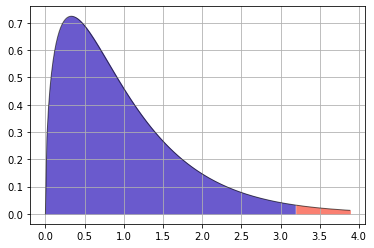

In [11]:
params = dict(zip(["dfn", "dfd", "lb", "ub", "decimals"], [3, 196, 0, 0.975, 3]))

prob_calc_f = ProbabilityCalculator("F", params)
prob_calc_f.calculate()
prob_calc_f.plot()

Probability calculator
Distribution: t
Df:	196
Mean:	0.0
St. dev:	1.005
Lower bound:	0.025
Upper bound:	0.975

P(X < -1.972) = 0.025
P(X > -1.972) = 0.975
P(X < 1.972) = 0.975
P(X > 1.972) = 0.025
P(-1.972 < X < 1.972) = 0.95
1 - P(-1.972 < X < 1.972 = 0.05


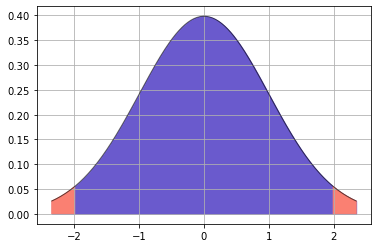

In [12]:
params = dict(zip(["df", "lb", "ub", "decimals"], [196, 0.025, 0.975, 3]))

prob_calc_t = ProbabilityCalculator("t", params)
prob_calc_t.calculate()
prob_calc_t.plot()

### Example 2: Ideal data for regression

The data `ideal` contains simulated data that is very useful to demonstrate what data for, and residuals from, a regression should ideally look like. The data has 1,000 observations on 4 variables. `y` is the response variable and `x1`, `x2`, and `x3` are explanatory variables. The plots shown below can be used as a bench mark for regressions on real world data

In [13]:
rsm.load_data(pkg="model", name="ideal", dct=globals())

In [14]:
rsm.describe(ideal)

## 'Ideal' data for regression

### Description

Simulated data set used to illustrate evaluation of regression residuals.  

### Variables

A data frame with 1000 observations on 4 variables (y, x1, x2, and x3)

In [18]:
evars = ["x1", "x2", "x3"]
rvar = "y"

In [19]:
fitted = regress(ideal, evars=evars, rvar=rvar)

Data:  'ideal'
Response variable    : y
Explanatory variables: x1, x2, x3
Null hyp.: the effect of x on y is zero
Alt. hyp.: the effect of x on y is not zero

                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     1361.
Date:                Sun, 15 May 2022   Prob (F-statistic):               0.00
Time:                        15:39:10   Log-Likelihood:                -2100.2
No. Observations:                1000   AIC:                             4208.
Df Residuals:                     996   BIC:                             4228.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P

In [31]:
rsm.distr_plot(ideal)

NameError: name 'ideal' is not defined

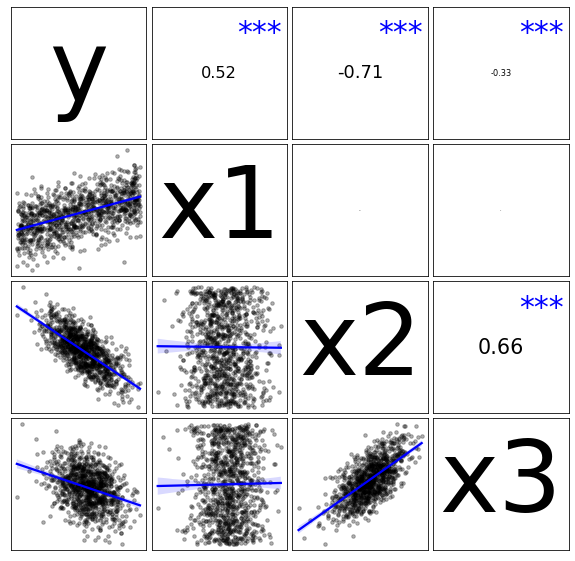

In [25]:
cr = rsm.correlation(ideal[["y", "x1", "x2", "x3"]])
cr.plot(nobs=-1, figsize=(10, 10))

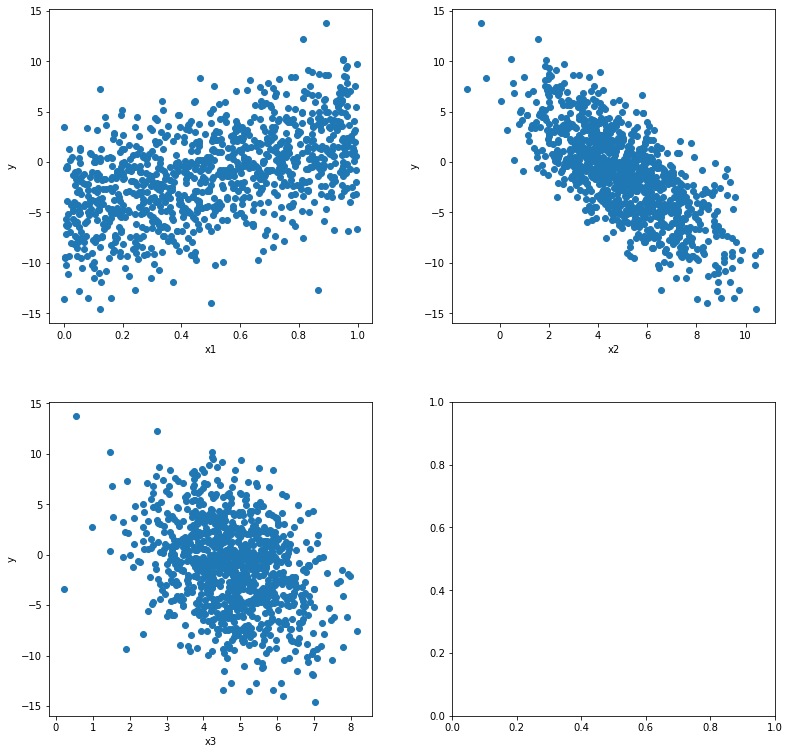

In [27]:
scatter_plot(fitted)

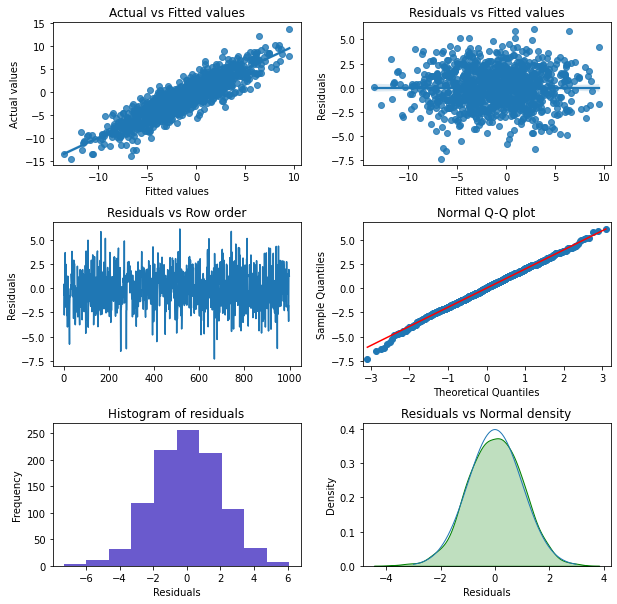

In [28]:
rsm.reg_dashboard(fitted=fitted, nobs=-1)

In [ ]:
import seaborn as sns

In [ ]:
def residual_vs_explanatory_plot(fitted: statsmodels.regression.linear_model.RegressionResults,
                            nobs: int=1000) -> None:
    # TODO: add figsize param
    num_exog = len(fitted.model.exog_names) - 1
    num_rows = ceil(num_exog / 2)


    _, axes = plt.subplots(num_rows, 2, figsize=(13, 13))
    plt.subplots_adjust(wspace=0.25, hspace=0.25)

    idx = 0
    exog_names = fitted.model.exog_names

    residuals = fitted.resid
    exogs = fitted.model.exog

    data = pd.DataFrame(exogs, columns=exog_names)
    data["residuals"] = residuals

    if nobs < fitted.model.endog.shape[0] and nobs != np.Inf and nobs != -1:
        data = data.copy().sample(nobs)

    while idx < num_exog:
        row = idx // 2
        col = idx % 2
        exog_name = exog_names[idx]
        exog = [row[idx] for row in exogs]

        if num_rows > 1:
            sns.regplot(x=exog_name, y="residuals", data=data, ax=axes[row][col], scatter_kws={"color": "black"}).set(
                        xlabel=exog_name, ylabel="Residuals")
        else:
            sns.regplot(x=exog_name, y="residuals", data=data, ax=axes[col], scatter_kws={"color": "black"}).set(
                        xlabel=exog_name, ylabel="Residuals")
        idx += 1
    plt.show()


In [ ]:
residual_vs_explanatory_plot(fitted)